In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.signal import savgol_filter 
from plotly import express as px

plt.style.use('ggplot')

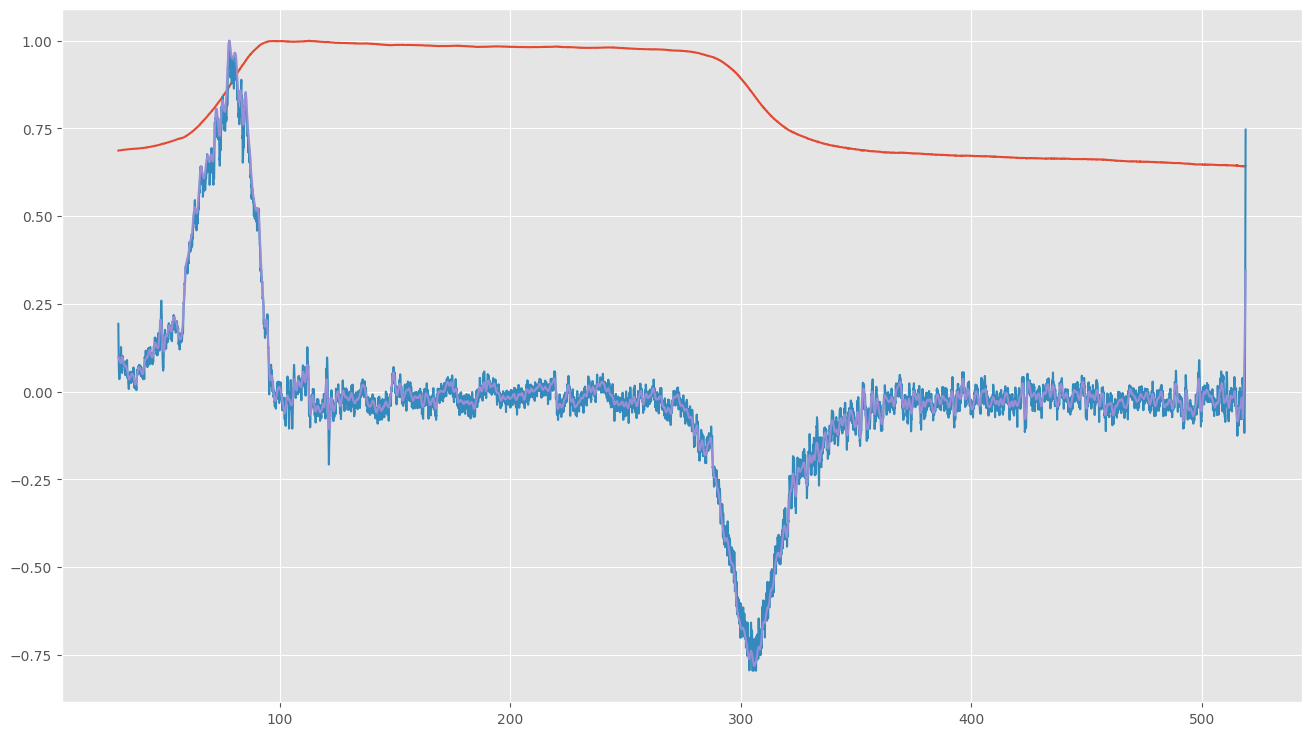

In [66]:
k=10
df=pd.read_csv(f'peltier_cosas/peltiermod{k}.csv')
t=np.array(range(len(df)))
df_video=pd.read_csv(f'procesados/video{k}_Lab_sliced_cut.csv')

y=df_video['L']
t=df_video['t']
t=t[30*25:-25]
y=y[30*25:-25]


y_smooth = savgol_filter(y,60,5)
# dy = np.gradient(y,t)
dy_smooth = np.gradient(y_smooth,t)
dy_smooth_smooth = savgol_filter(dy_smooth,60,2)

plt.figure(figsize=(16,9))
# plt.plot(t,dy)
plt.plot(t,y/np.max(y))
plt.plot(t,dy_smooth/np.max(dy_smooth))
plt.plot(t,dy_smooth_smooth/np.max(dy_smooth_smooth))


In [ ]:


px.line(x=t,y=dy_smooth_smooth)


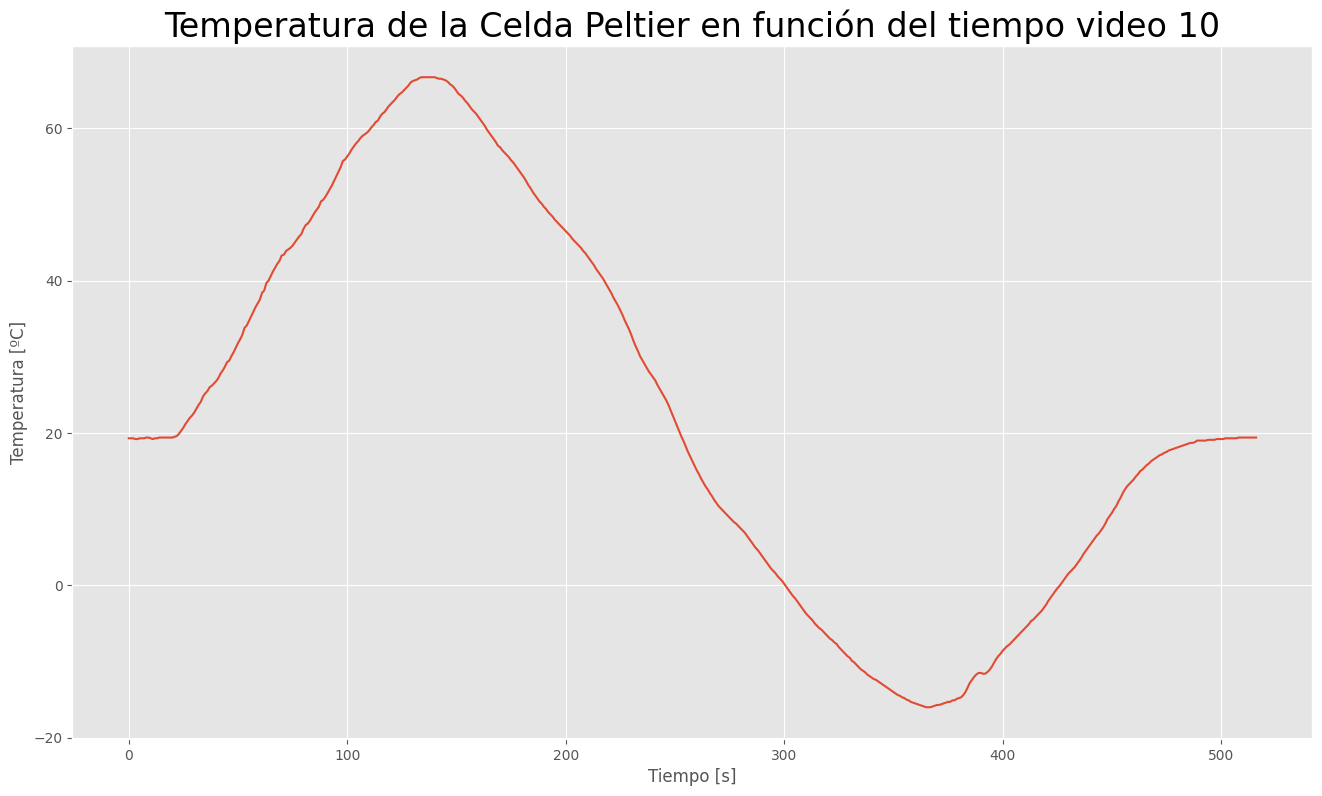

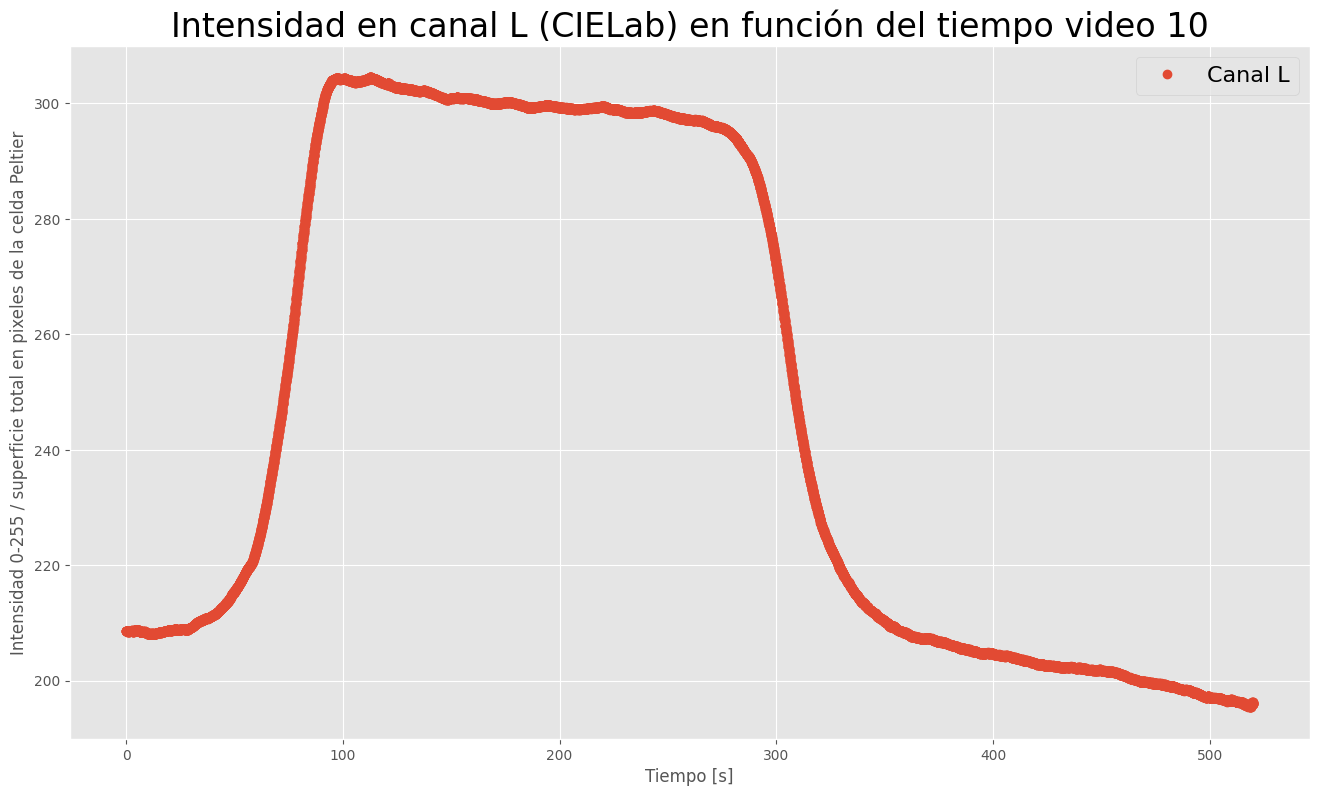

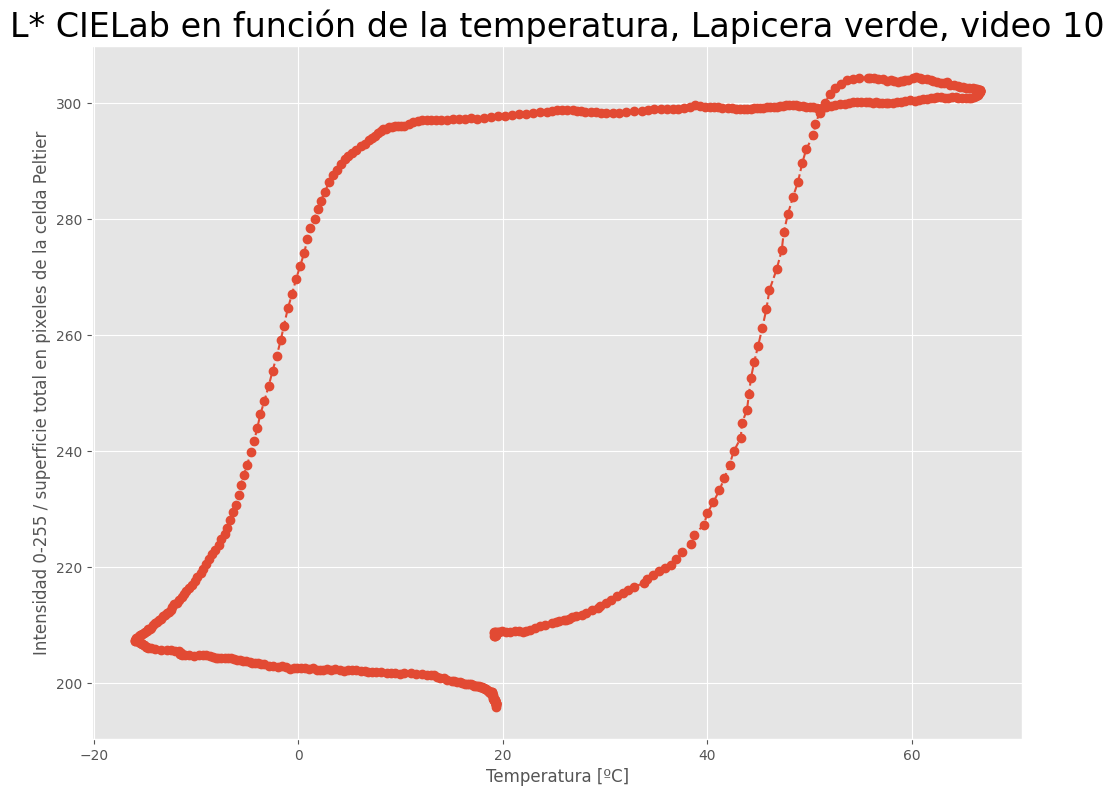

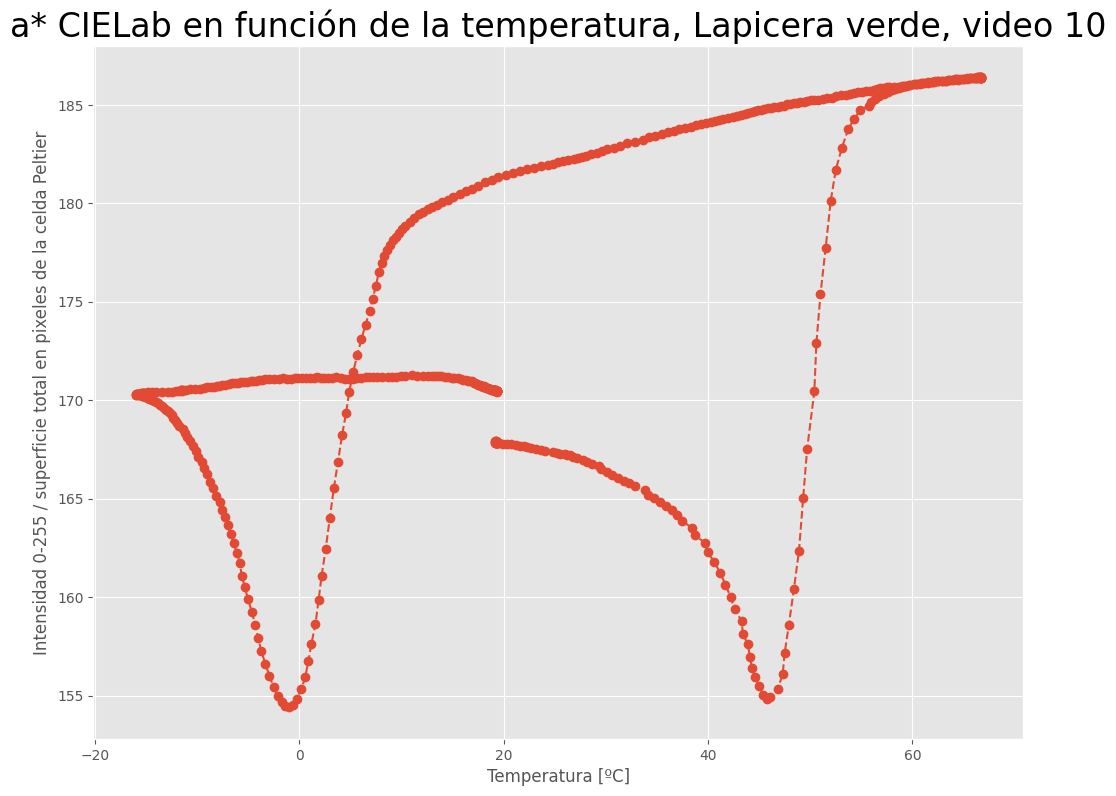

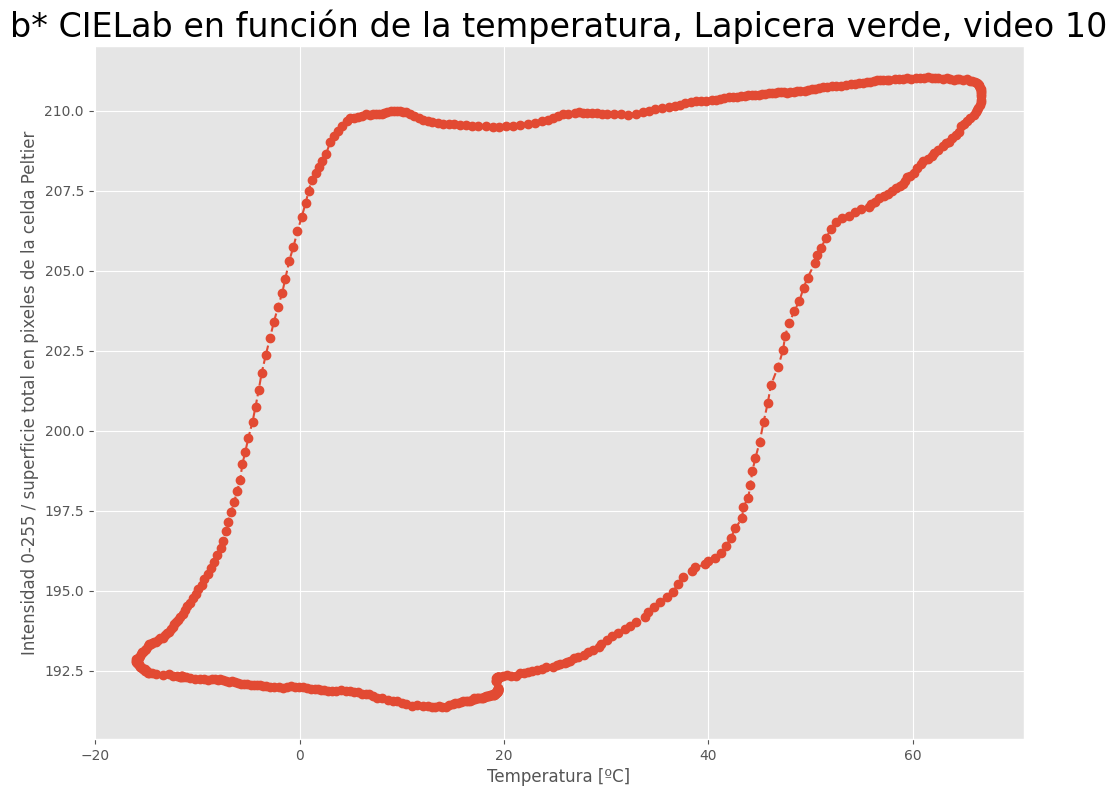

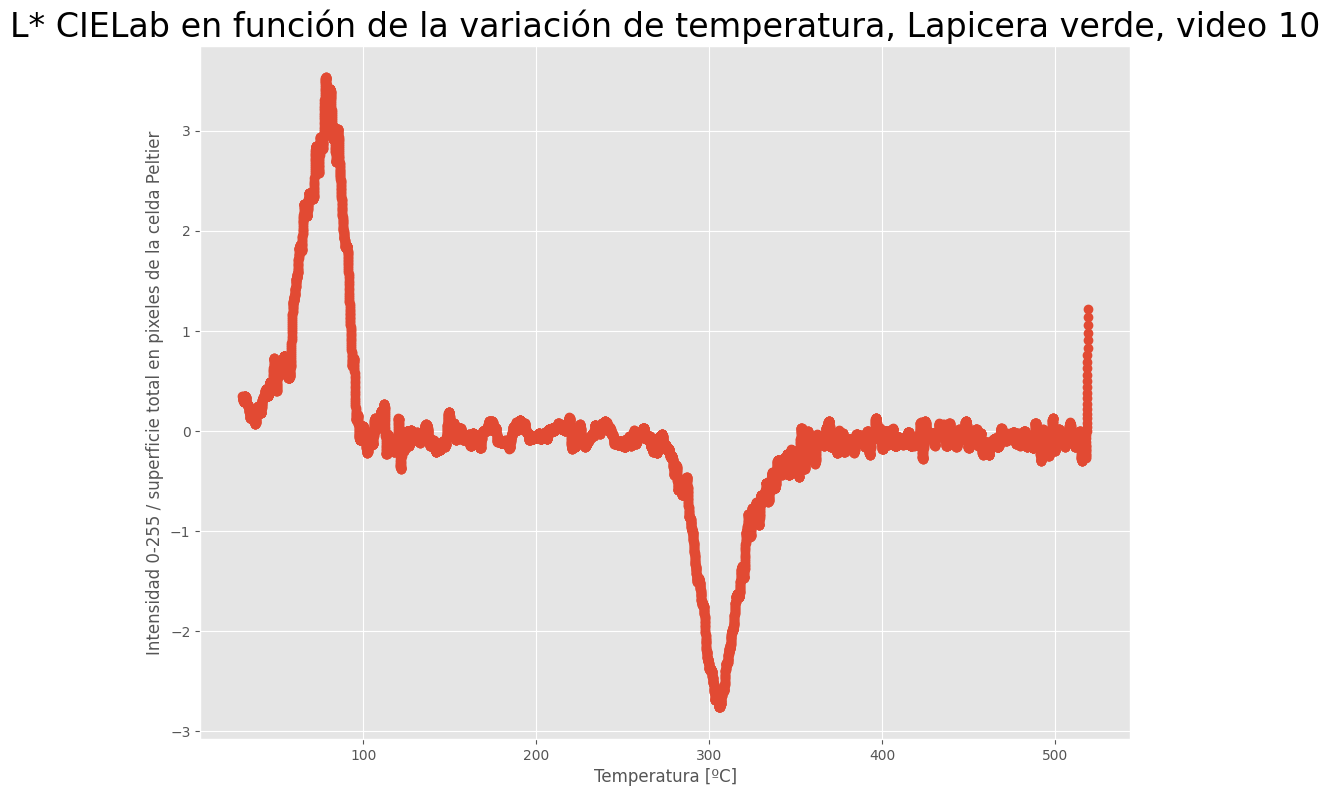

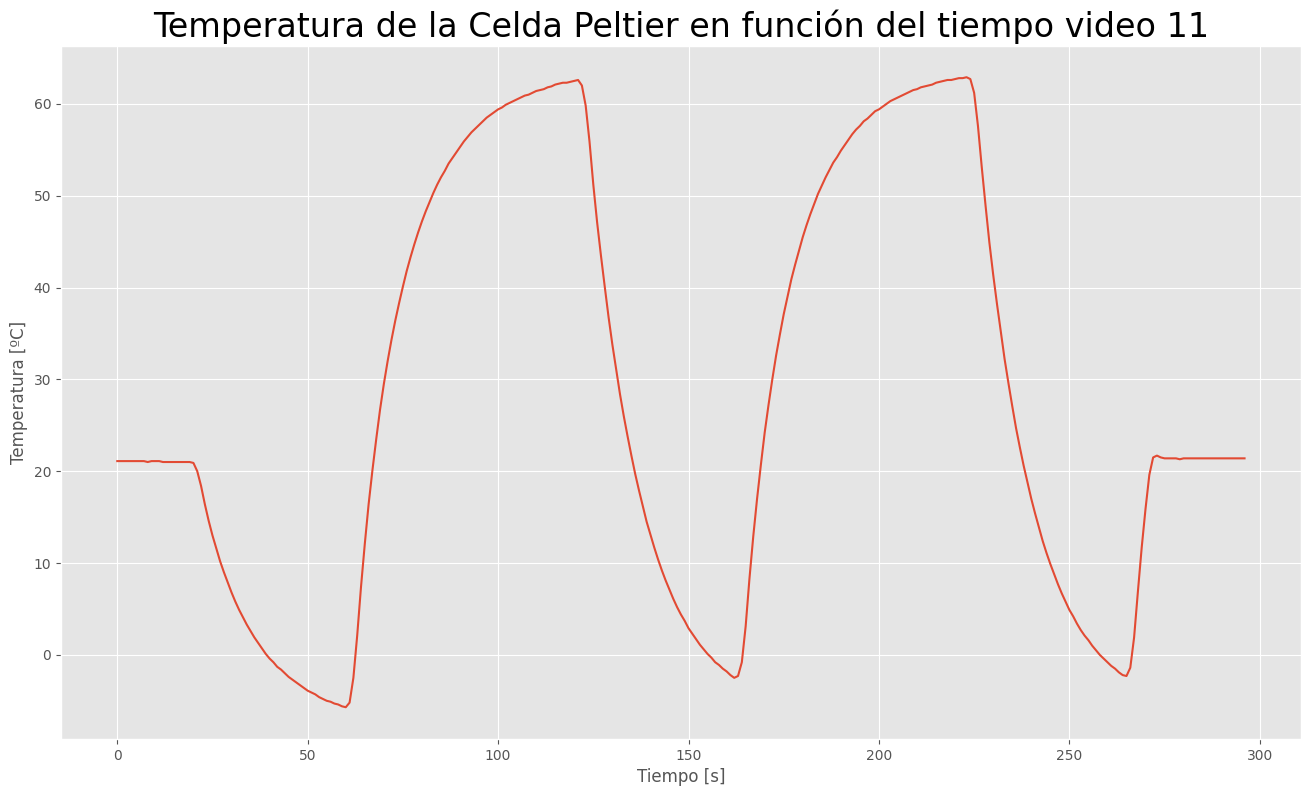

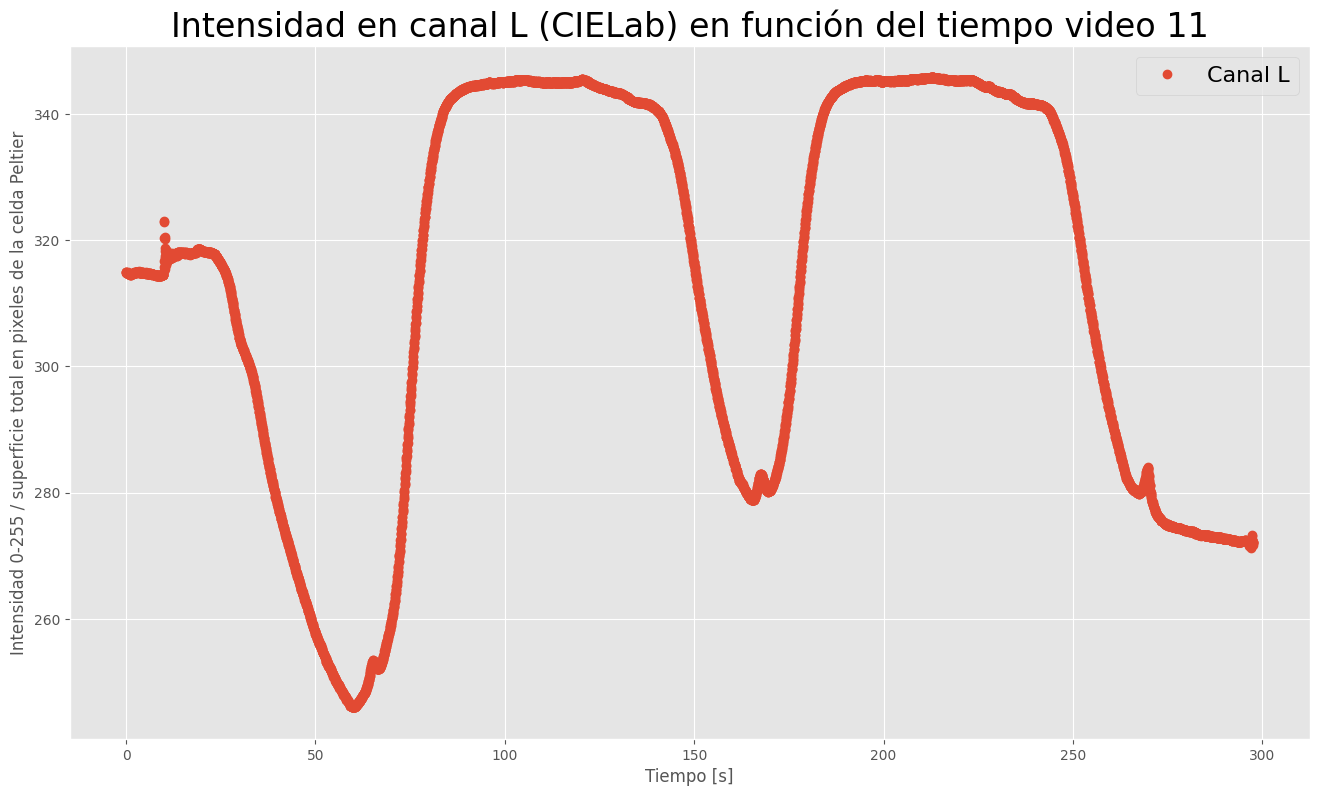

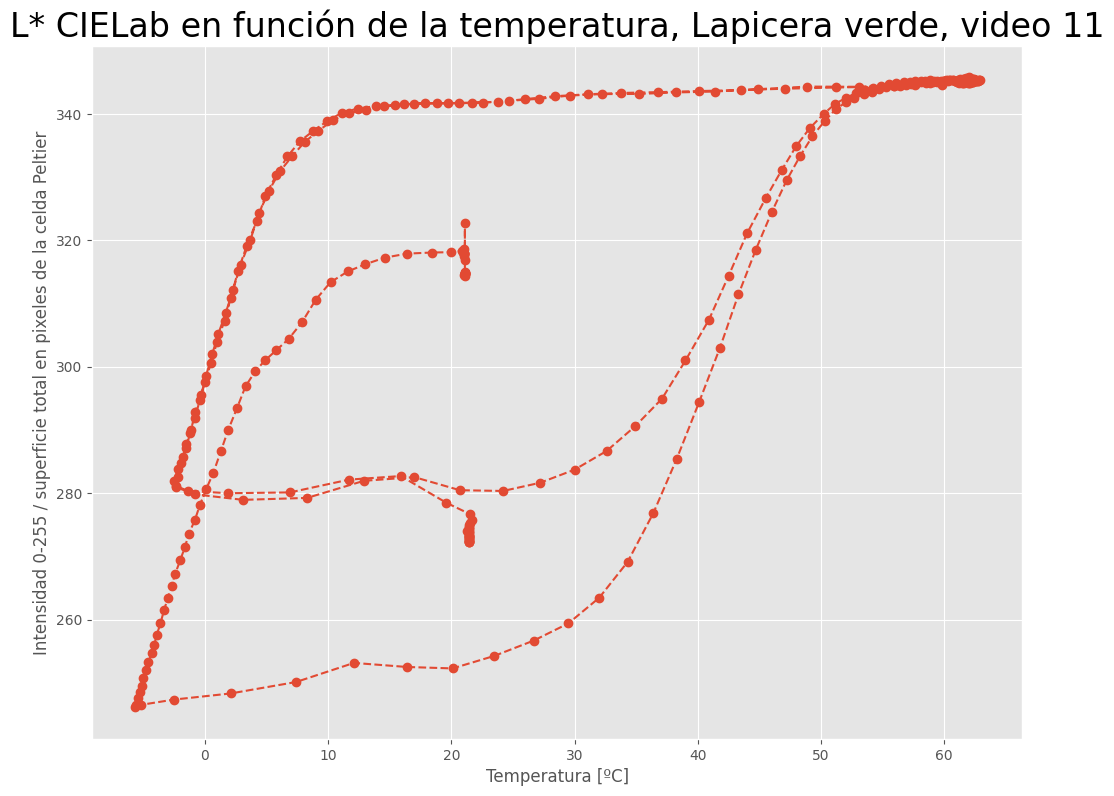

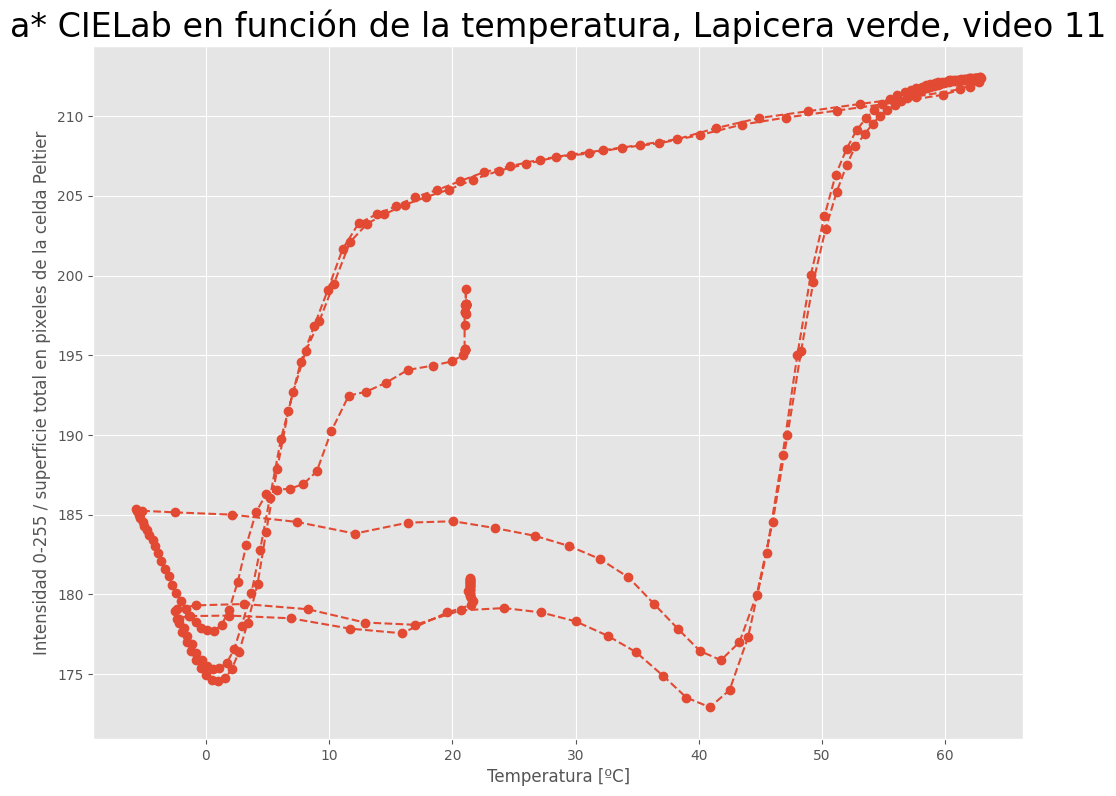

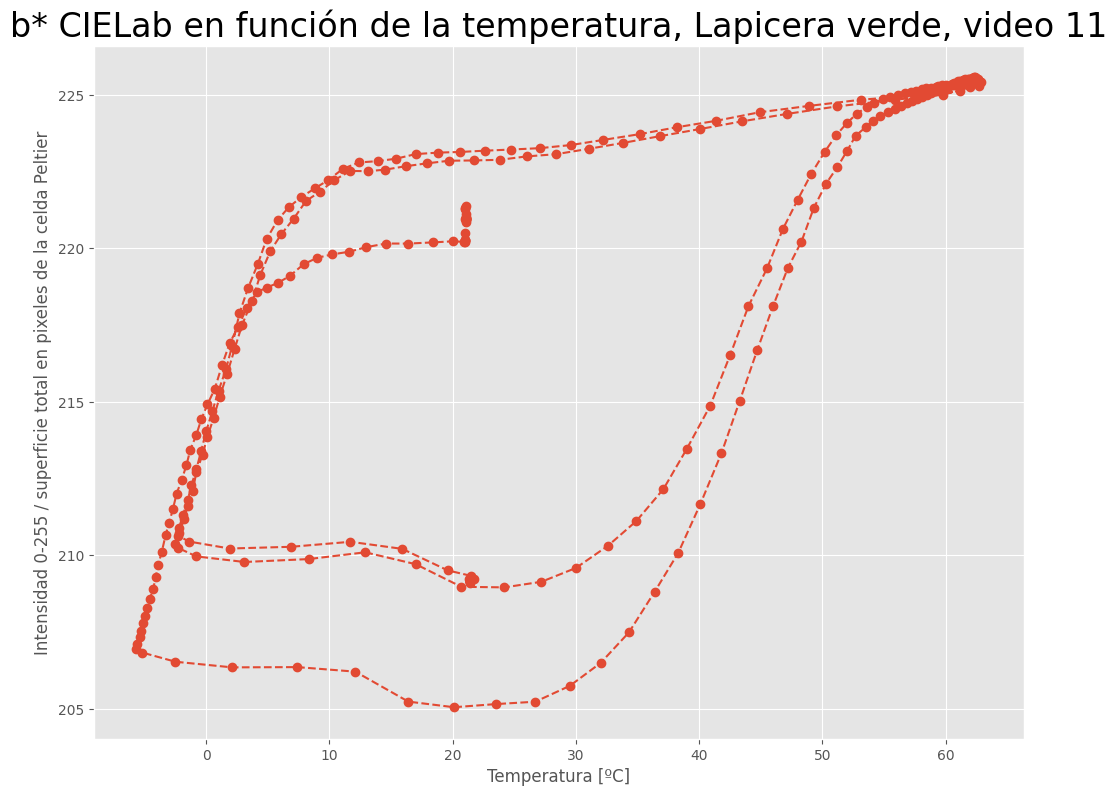

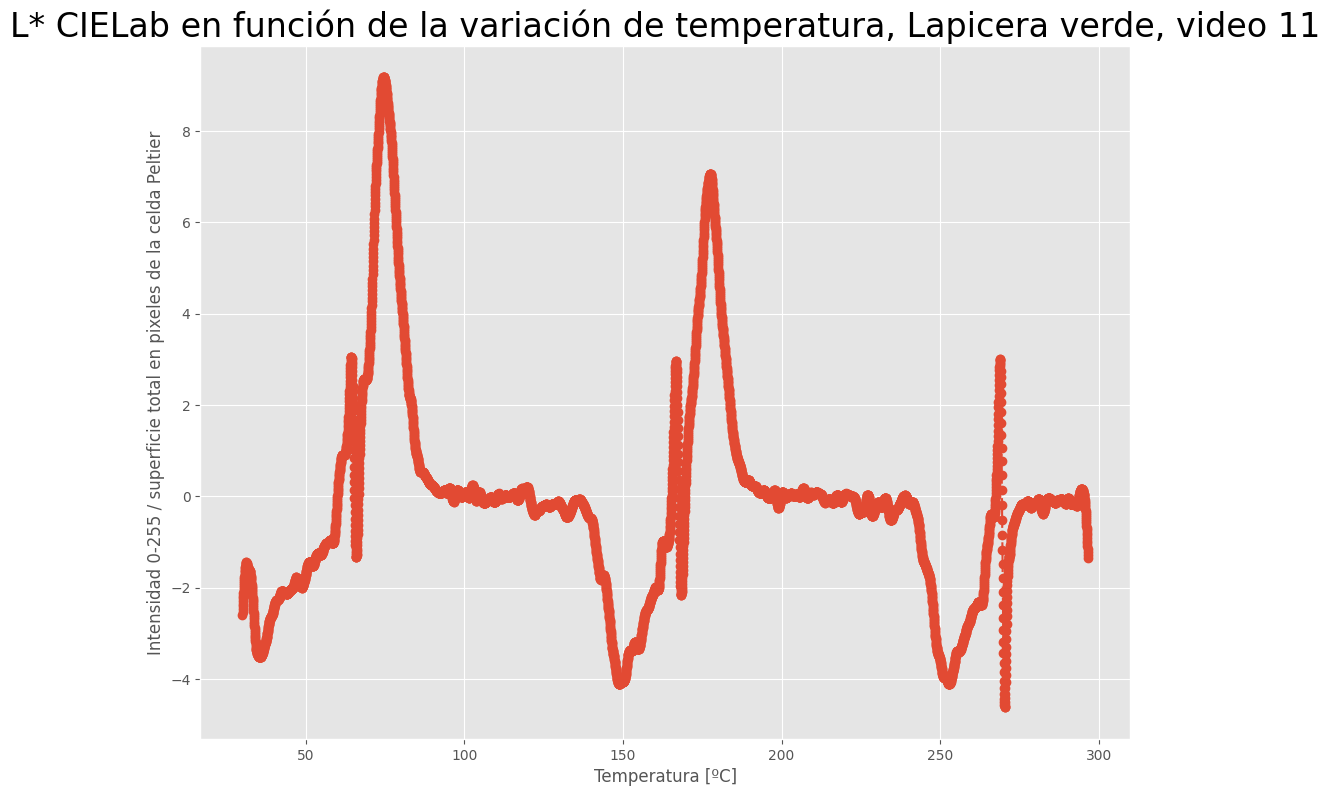

In [62]:
low=10
high=11
dashdash='--'
color = 'verde'
for k in range(low,high+1):
    df=pd.read_csv(f'peltier_cosas/peltiermod{k}.csv')
    t=np.array(range(len(df)))
    df_video=pd.read_csv(f'procesados/video{k}_Lab_sliced_cut.csv')

    plt.figure(figsize=(16,9))
    plt.title(f'Temperatura de la Celda Peltier en función del tiempo video {k}',fontsize=24)
    plt.plot(t,df['temp'])
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Temperatura [ºC]')
    plt.savefig(f'graficos/Lab/video{k}_tiempo_temperatura.png', bbox_inches='tight', dpi=150)

    plt.figure(figsize=(16,9))
    plt.plot(df_video['t'],df_video['L'],f'o', label=f'Canal L')
    plt.title(f'Intensidad en canal L (CIELab) en función del tiempo video {k}',fontsize=24)
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Intensidad 0-255 / superficie total en pixeles de la celda Peltier')
    plt.legend(fontsize=16)
    plt.savefig(f'graficos/Lab/video{k}_tiempo_L_CIELab.png', bbox_inches='tight', dpi=150)
    
    for i in ['L','a','b']:
        plt.figure(figsize=(12,9))
        plt.title(f'{i}* CIELab en función de la temperatura, Lapicera {color}, video {k}',fontsize=24)
        plt.xlabel('Temperatura [ºC]')
        plt.ylabel('Intensidad 0-255 / superficie total en pixeles de la celda Peltier')
        y=np.interp(t, df_video['t'], df_video[i])
        plt.plot(df['temp'],y, 'o--')
        plt.savefig(f'graficos/Lab/video{k}_temperatura_{i}_CIELab.png', bbox_inches='tight', dpi=150)



    plt.figure(figsize=(12,9))
    plt.title(f'L* CIELab en función de la variación de temperatura, Lapicera {color}, video {k}',fontsize=24)
    plt.xlabel('Temperatura [ºC]')
    plt.ylabel('Intensidad 0-255 / superficie total en pixeles de la celda Peltier')

    L_t=df_video['t'][30*25:-25]
    L_y=df_video['L'][30*25:-25]

    t_prima=t[30*25:-25]

    L_y_smooth = savgol_filter(L_y,60,5)
    dL_y_smooth = np.gradient(L_y_smooth,L_t)
    dL_y_smooth_smooth = savgol_filter(dL_y_smooth,60,2)        
    
    L_y_interp=np.interp(t_prima, L_t, dL_y_smooth_smooth)
    
    plt.plot(L_t , dL_y_smooth_smooth, 'o--')
    plt.savefig(f'graficos/Lab/video{k}_diff_temperatura_L_CIELab.png', bbox_inches='tight', dpi=150)
    y=0
